# Cohort Tracking with ehrapy


The use of non-representative samples of the population when doing research on health questions gives raise to serious issues, importantly
- conclusions drawn on subgroups (by age, gender, race, ...) may not generalize to other subgroups
- underrepresented group's characteristics may be hidden by the overrepresented group's data
- models, such as clinical algorithms, trained on such samples may pick up, or even further amplify, biases in e.g. clinical decision making

An appropriate (patient) sample is integral to any type of (medical) research.
For studies addressing medical questions, it is necessary to define exclusion and inclusion criteria. In order to detect, track and monitor the effects of such criteria on the composition of the study cohort, [Ellen et al.](https://www.medrxiv.org/content/10.1101/2023.10.05.23296611v1.full.pdf) propose a visual aid in the form of a flowchart diagram.

Here, we show how the modular toolbox ehrapy can help to track and visualize key demographics of interest.
It can do so from the initial dataset, towards necessary filtering steps, until the final dataset for the analysis is produced, and hereby helps assessing the impact of processing steps or exclusion decisions.


Important for many reasons

#### Review quotes:
- We agree with reviewers that a more nuanced consideration of the nature of EHR data (especially with respect to treatment of bias in the data) would strengthen your case for publication in Nature Medicine. 

- Please note also that the article should be accessible to the broad (clinical) readership of our journal and that the appeal for non-technical practitioners should be made clear throughout the paper.

- While the workflow for data analysis is robust there should be consideration of how the population changes throughout the analysis process. Particularly with respect to imputation or exclusion criteria. Referencing studies like https://www.medrxiv.org/content/10.1101/2023.10.05.23296611v1.full.pdf could provide insights into addressing this aspect in your framework. Furthermore, providing a more granular picture summarizing the patient cohort in a tableone function would be of great value e.g. https://pypi.org/project/tableone/

- The biggest threat to health “big data” delivering its promise stems from the risk of incorporating implicit biases in decision-making that are captured in the data routinely collected in the process of care. In addition, models that learn the association between patient features and clinical outcomes, without factoring in social determinants of health and social determinants of care are bound to cement existing structural inequities. A module dedicated to identifying data issues and approaches to mitigating their impact is almost required.

- [appeal to] medical or epidemiological audience which would find many of the approaches proposed here rather naive. 


### Referenced paper quotes

My notes:
Bias in datasets dangerous: ehrapy helps to detect and mitigate by virtue of offering many (else scattered) exploratory data analysis tools

For clinical readership, graphical visualization is important. May it be to show during meetings, or during analysis: Ehrapy's strength.



In [1]:
import ehrapy as ep
from tableone import TableOne

/Users/eljasroellin/Documents/ehrapy_clean/ehrapy_venv_march_II/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Tableone
nice package

In [2]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "time_in_hospital_days"])
TableOne(adata.obs)

2024-03-13 11:17:19,282 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `48`.


Missing       Overall
n                                                           101766
gender, n (%)                0.0                   3  54708 (53.8)
                             1.0                      47055 (46.2)
race, n (%)                  AfricanAmerican    2273  19210 (19.3)
                             Asian                       641 (0.6)
                             Caucasian                76099 (76.5)
                             Hispanic                   2037 (2.0)
                             Other                      1506 (1.5)
time_in_hospital_days, n (%) 1                     0  14208 (14.0)
                             10                         2342 (2.3)
                             11                         1855 (1.8)
                             12                         1448 (1.4)
                             13                         1210 (1.2)
                             14                         1042 (1.0)
                             2                        17224 (16.9)
                             3                        17756 (17.4)
                             4                        13924 (13.7)
                             5                          9966 (9.8)
                             6                          7539 (7.4)
                             7                          5859 (5.8)
                             8                          4391 (4.3)
                             9                          3002 (2.9)

### CohortTracker
A visualization aid automated in ehrapy: summarizing tableone information graphically.
Especially useful for cohort processing, as the overview component becomes even more important there

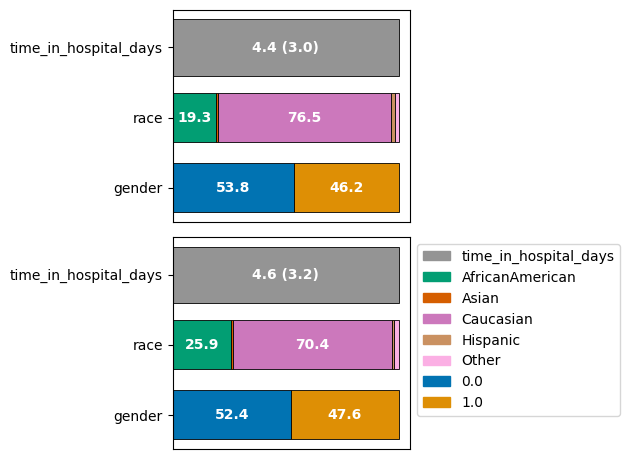

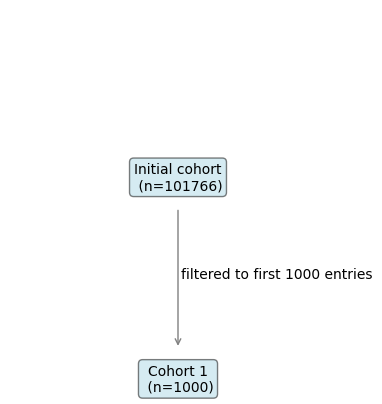

In [3]:
# instantiate the cohort tracker
pop_track = ep.tl.CohortTracker(adata, categorical=["gender", "race"])

# track the initial state of the dataset
pop_track(adata, label="Initial cohort")

# do a filtering step
adata = adata[:1000]

# track the filtered dataset
pop_track(adata, label="Cohort 1", operations_done="filtered to first 1000 entries")

# plot the change of the cohort
pop_track.plot_cohort_barplot()

# plot a flowchart
pop_track.plot_flowchart()

Some nice plotting options are available

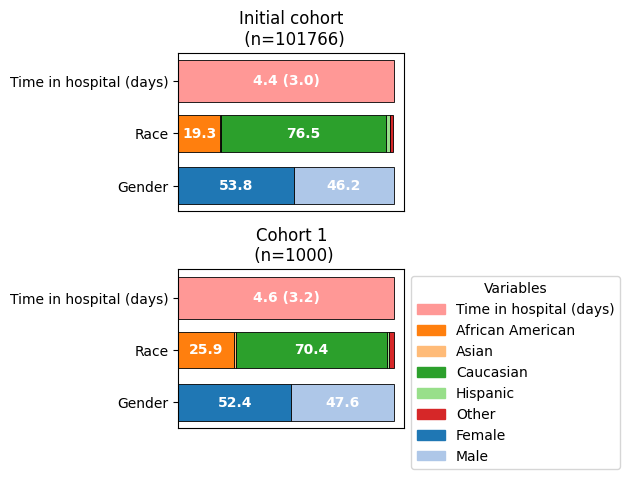

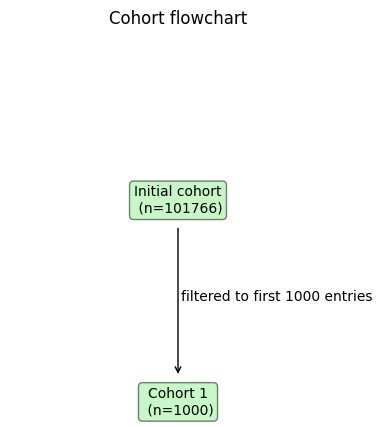

In [11]:
pop_track.plot_cohort_barplot(
    subfigure_title=True,
    yticks_labels={
        "time_in_hospital_days": "Time in hospital (days)",
        "race": "Race",
        "gender": "Gender",
    },
    color_palette="tab20",
    legend_labels={
        "time_in_hospital_days": "Time in hospital (days)",
        "AfricanAmerican": "African American",
        0.0: "Female",
        1.0: "Male",
    },
    legend_kwargs={"title": "Variables", "bbox_to_anchor": (1, 1)},
)

pop_track.plot_flowchart(
    title="Cohort flowchart",
    arrow_size=0.75,
    bbox_kwargs={"fc": "lightgreen"},
    arrowprops_kwargs={"color": "black"},
)